In [10]:
import sys
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

ROOT_DIR = os.path.abspath('..')
sys.path.append(ROOT_DIR)

from utils.dataset import get_dataset
from models.clip import Model

In [2]:
cub_dataset = get_dataset('CUB_200_2011', os.path.join(ROOT_DIR, 'data'))

In [8]:
model = Model()

In [4]:
text_input = [f'a photo of a bird, knowm as {bird_name}' for bird_name in cub_dataset.classes]

In [15]:
text_input[0]

'a photo of a bird, knowm as Black footed Albatross'

In [12]:
text_features = model.encode_text(text_input).detach().cpu().numpy()

In [ ]:
class tSNEVisualizer:
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def plot(self):
        tsne = TSNE(n_components=2, random_state=0)
        X_2d = tsne.fit_transform(self.features)

        target_ids = range(len(self.labels))

        plt.figure(figsize=(6, 5))
        colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'
        for i, c, label in zip(target_ids, colors, self.labels):
            plt.scatter(X_2d[self.labels == i, 0], X_2d[self.labels == i, 1], c=c, label=label)
        plt.legend()
        plt.show()

In [13]:
tsne = TSNE(n_components=2, random_state=42)
text_embeddings_2d = tsne.fit_transform(text_features)

c:\ProgramData\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


200it [00:00, 594.00it/s]


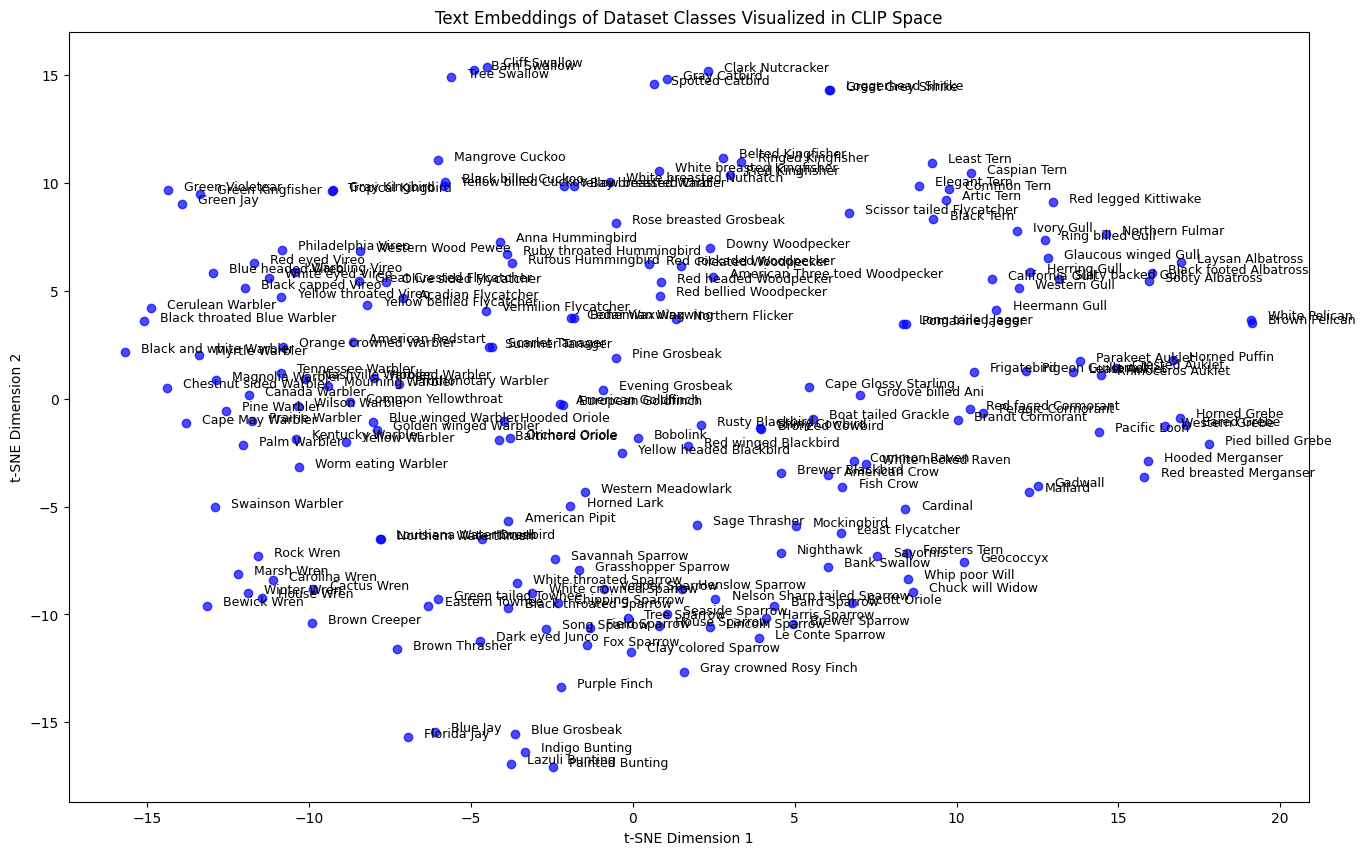

In [14]:
from tqdm import tqdm

plt.figure(figsize=(16, 10))
for i, class_name in tqdm(enumerate(cub_dataset.classes)):
    x, y = text_embeddings_2d[i]
    plt.scatter(x, y, marker='o', color='b', alpha=0.7)
    plt.text(x + 0.5, y, class_name, fontsize=9)

plt.title("Text Embeddings of Dataset Classes Visualized in CLIP Space")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()